In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import scipy
import statistics
import seaborn as sns 
from scipy import stats

In [77]:
data = pd.read_csv("Mall_Customers.csv")
data.head(10)

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [78]:
# xem tt dữ liệu
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   CustomerID          200 non-null    int64 
 1   Genre               200 non-null    object
 2   Age                 200 non-null    int64 
 3   Annual_Income_(k$)  200 non-null    int64 
 4   Spending_Score      200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [79]:
df_1 = data.copy()
Type = []
for x in df_1['Annual_Income_(k$)']:
    if x <= 20:
        Type.append('Low')
    elif 20 < x <= 50:
        Type.append('Medium')
    elif 50 < x <= 80:
        Type.append('High')
    else:
        Type.append('Huge')

df_1.insert(5, "Type_Income", Type)
df_1.sample(10)

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score,Type_Income
41,42,Male,24,38,92,Medium
153,154,Female,38,78,76,High
14,15,Male,37,20,13,Low
136,137,Female,44,73,7,High
141,142,Male,32,75,93,High
176,177,Male,58,88,15,Huge
128,129,Male,59,71,11,High
9,10,Female,30,19,72,Low
72,73,Female,60,50,49,Medium
73,74,Female,60,50,56,Medium


In [80]:
# bảng thống kê % thu nhập
x = df_1.groupby('Type_Income')['Type_Income'].count()
x = pd.DataFrame(x)
x.columns = ['Percent']
type_inc = x/sum(x['Percent'])*100
type_inc

,Percent
Type_Income,
High,44.0
Huge,19.0
Low,8.0
Medium,29.0


Text(0, 0.5, 'Percent')

<Figure size 576x576 with 0 Axes>

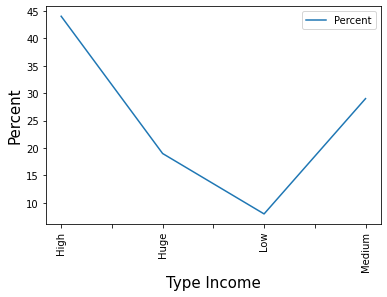

In [81]:
plt.figure(figsize=(8, 8))
type_inc.plot()
plt.xticks(rotation =90, fontsize=10)
plt.xticks(fontsize=10)
plt.xlabel('Type Income', fontsize=15)
plt.ylabel('Percent', fontsize=15)

In [82]:
df_2 = data.copy()
Type = []
for x in data['Spending_Score']:
    if x <= 20:
        Type.append('Low')
    elif 20 < x <= 50:
        Type.append('Medium')
    elif 50 < x <= 80:
        Type.append('High')
    else:
        Type.append('Huge')

df_2.insert(5, "Type_Spending", Type)
df_2.sample(10)

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score,Type_Spending
28,29,Female,40,29,31,Medium
56,57,Female,51,44,50,Medium
16,17,Female,35,21,35,Medium
172,173,Male,36,87,10,Low
54,55,Female,50,43,45,Medium
138,139,Male,19,74,10,Low
7,8,Female,23,18,94,Huge
147,148,Female,32,77,74,High
195,196,Female,35,120,79,High
185,186,Male,30,99,97,Huge


In [83]:
# bảng thống kê % spending
x = df_2.groupby('Type_Spending')['Type_Spending'].count()
x = pd.DataFrame(x)
x.columns = ['Percent']
type_inc = x/sum(x['Percent'])*100
type_inc

,Percent
Type_Spending,
High,33.5
Huge,15.0
Low,18.0
Medium,33.5


Text(0, 0.5, 'Percent')

<Figure size 576x576 with 0 Axes>

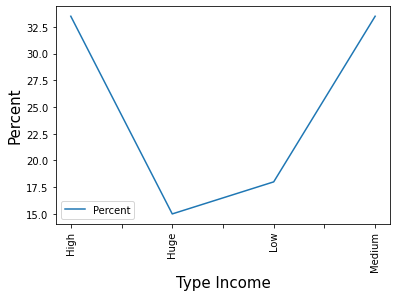

In [84]:
plt.figure(figsize=(8, 8))
type_inc.plot()
plt.xticks(rotation =90, fontsize=10)
plt.xticks(fontsize=10)
plt.xlabel('Type Income', fontsize=15)
plt.ylabel('Percent', fontsize=15)

In [85]:
data['Genre'].value_counts()

Female    112
Male       88
Name: Genre, dtype: int64

In [86]:
gender = pd.DataFrame(data['Genre'].value_counts())
gender.reset_index(inplace=True)
gender

,index,Genre
0,Female,112
1,Male,88


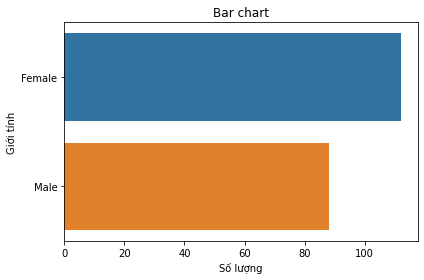

In [87]:
# Barplot:
plot0=sns.barplot(x='Genre',y='index',data = gender)
plt.title('Bar chart')
plt.xlabel('Số lượng')
plt.ylabel('Giới tính')
plt.tight_layout()

In [88]:
# tính trung bình cột

print("Giá trị trung bình:")
pd.DataFrame(data.mean()).T

Giá trị trung bình:


,CustomerID,Age,Annual_Income_(k$),Spending_Score
0,100.5,38.85,60.56,50.2


In [89]:
# tính trung vị

print("Trung vị :")
pd.DataFrame(data.median()).T

Trung vị :


,CustomerID,Age,Annual_Income_(k$),Spending_Score
0,100.5,36.0,61.5,50.0


In [90]:
#tìm mode

print("Yếu vị :")
data_1 = data.mode(dropna = True)
data_1.iloc[0]

Yếu vị :


CustomerID                 1
Genre                 Female
Age                     32.0
Annual_Income_(k$)      54.0
Spending_Score          42.0
Name: 0, dtype: object

In [91]:
min_value = data.min(skipna= True, numeric_only= True)
print(min_value)
print('-'*50)

CustomerID             1
Age                   18
Annual_Income_(k$)    15
Spending_Score         1
dtype: int64
--------------------------------------------------


In [92]:

max_value = data.max(skipna= True, numeric_only= True)
print(max_value)
print('-'*50)

CustomerID            200
Age                    70
Annual_Income_(k$)    137
Spending_Score         99
dtype: int64
--------------------------------------------------


In [93]:
# tính độ lệch chuẩn

print("Độ lệch chuẩn :")
data.std(skipna = True)

Độ lệch chuẩn :


CustomerID            57.879185
Age                   13.969007
Annual_Income_(k$)    26.264721
Spending_Score        25.823522
dtype: float64

In [94]:
# bảng biểu diễn sự phụ thuộc lẫn nhau của các cột

data_mx = data.corr(method = "pearson")
data_mx

,CustomerID,Age,Annual_Income_(k$),Spending_Score
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual_Income_(k$),0.977548,-0.012398,1.000000,0.009903
Spending_Score,0.013835,-0.327227,0.009903,1.000000


<AxesSubplot:>

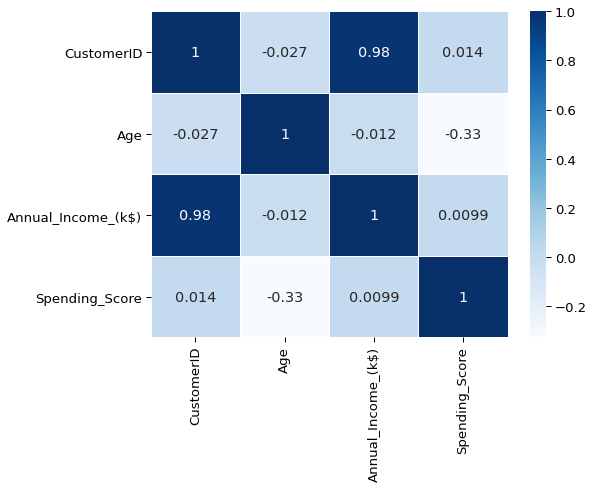

In [95]:
plt.figure(figsize=(8,6))
sns.set_context('paper', font_scale=1.5)

sns.heatmap(data_mx, annot=True, cmap='Blues', linewidths=0.5, linecolor='white')

Text(0, 0.5, 'Count')

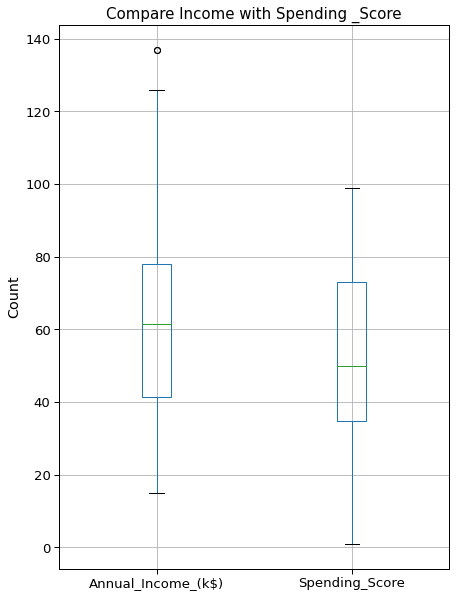

In [96]:
# tương quan thu nhập và điểm chi tiêu

plt.figure(figsize=(7, 10))
plt.title('Compare Income with Spending _Score', fontsize=15)
data[['Annual_Income_(k$)', 'Spending_Score']].boxplot()
plt.ylabel('Count')

Text(0, 0.5, 'Count')

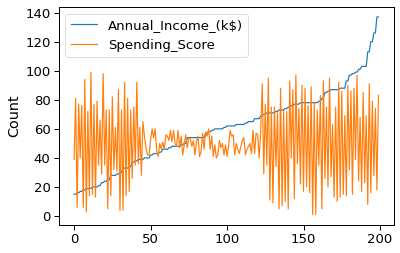

In [97]:
data[["Annual_Income_(k$)", "Spending_Score"]].plot()
plt.ylabel('Count')

Text(0, 0.5, 'Count')

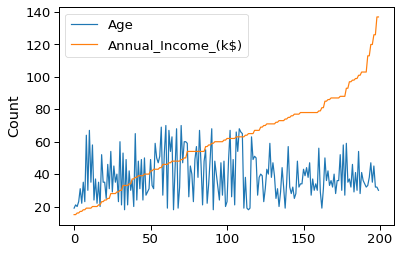

In [98]:
data[["Age", "Annual_Income_(k$)"]].plot()
plt.ylabel('Count')

Text(0, 0.5, 'Count')

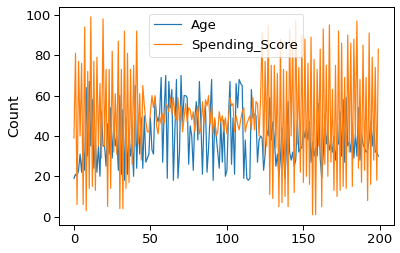

In [99]:
data[["Age", "Spending_Score"]].plot()
plt.ylabel('Count')

In [28]:
# dùng hàm describe để thống kê đơn giản dữ liệu

data.describe()

,CustomerID,Age,Annual_Income_(k$),Spending_Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000
